In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.folder_handler import *
from src.cort_processor import *
from src.cca_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
from src.utils import *
import pickle
import scipy as sio
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from src.wiener_filter import *
from matplotlib.pyplot import cm
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import os
import copy

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
with open('/home/diya/Documents/rat-fes/data/pickles/3-meepo_regular_923__session.pkl', 'rb') as inp: #YOUR PATH HERE
    cp1 = pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/meepo_10-10_session.pkl', 'rb') as inp: #YOUR PATH HERE
    cp2 = pickle.load(inp)
       
with open('/home/diya/Documents/rat-fes/data/pickles/rat-t_session.pkl', 'rb') as inp: #YOUR PATH HERE
    cp3 = pickle.load(inp) 


In [7]:
cc1 = CCAProcessor(cp1, cp2, metric_angle='forelimb', align=0)

should be good to align
(2110, 32)
(2110, 7)
(2110, 32)
(2110, 7)


In [35]:
cp1_h, cp1_vaf, _, _, = cp1.decode_angles()
print(np.average(cp1_vaf, 1))

[0.15  0.397 0.074 0.427 0.34  0.107 0.347]


In [16]:
cp2_procx = cc1.data['cp2']['proc_x']
cp2_procy = cc1.data['cp2']['proc_y']

cp2_procx_format, cp2_procy_format = format_data(cp2_procx, cp2_procy)

In [15]:
transformer, wpost, ypost = cc1.new_apply_ridge(metric_angle='forelimb', decoder=cp1_h, my_alpha=100)

initial_scoring is : -0.03
new_scoring is: 0.26


0.26


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
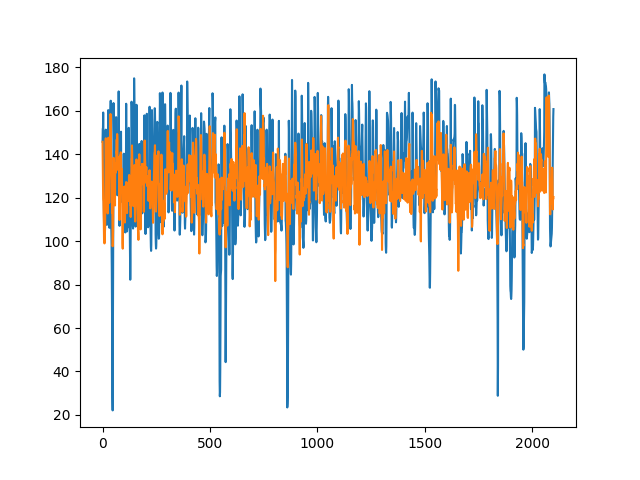

In [30]:
fig, ax = plt.subplots()
ax.plot(cp2_procy_format[:,6])
ax.plot(pinv_predic[:,6])
print(vaf(cp2_procy_format[:,6], ypost[:,6]))

In [21]:
clf, pinv_predic = cc1.apply_pinv_transform(x=cp2_procx, y=cp2_procy)

In [31]:
cc2 = CCAProcessor(cp3, cp2, metric_angle='forelimb', align=0)

should be good to align
(1079, 32)
(1079, 7)
(1079, 32)
(1079, 7)


In [34]:
cp3_h, cp3_vaf, _, _, = cp3.decode_angles()
print(np.average(cp3_vaf, 1))

[0.117 0.441 0.229 0.449 0.346 0.275 0.319]


In [40]:
cp2_pprocx = cc2.data['cp2']['proc_x']
cp2_pprocy = cc2.data['cp2']['proc_y']

cp2_pprocx_format, cp2_pprocy_format = format_data(cp2_pprocx, cp2_pprocy)

In [41]:
transformer, wpost, ypost = cc2.new_apply_ridge(metric_angle='forelimb', decoder=cp3_h, my_alpha=100)

initial_scoring is : -0.09
new_scoring is: 0.41


0.41


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
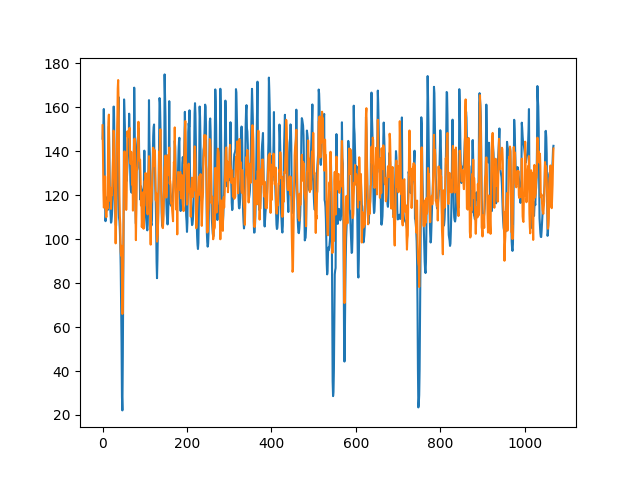

In [43]:
fig, ax = plt.subplots()
ax.plot(cp2_pprocy_format[:,6])
ax.plot(ypost[:,6]-20)
print(vaf(cp2_pprocy_format[:,6], ypost[:,6]))

In [44]:
clf, pinv_predic = cc2.apply_pinv_transform(x=cp2_pprocx, y=cp2_pprocy)

0.41


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
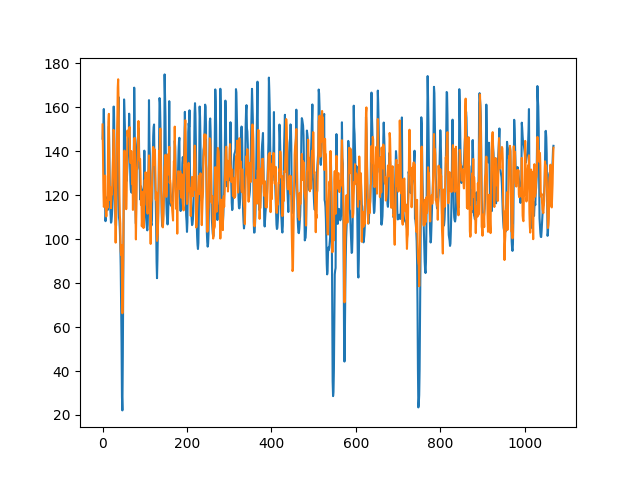

In [45]:
fig, ax = plt.subplots()
ax.plot(cp2_pprocy_format[:,6])
ax.plot(pinv_predic[:,6])
print(vaf(cp2_pprocy_format[:,6], pinv_predic[:,6]))

0.36


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
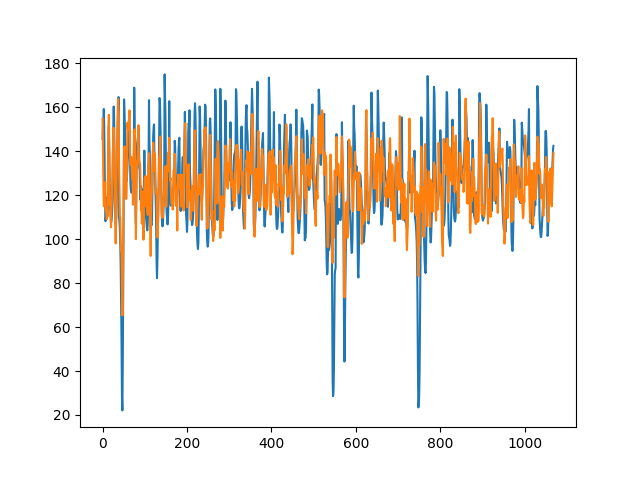

In [51]:
h_diya, _, _, _ = cp2.decode_angles(X=[cp2_pprocx], Y=[cp2_pprocy])
diya_predic = test_wiener_filter(cp2_pprocx_format, h_diya)
fig, ax = plt.subplots()
ax.plot(cp2_pprocy_format[:,6])
ax.plot(diya_predic[:,6])
print(vaf(cp2_pprocy_format[:,6], diya_predic[:,6]))